We will solve a Poisson equation:
$$\Delta u=2,\quad x\in[-1,1],$$
with the Neumman boundary conditions on the right boundary:
$$\left.\frac{du}{dx}\right|_{x=1}=4$$
and Dirichlet boundary conditions on the left boundary:
$$u(-1)=0.$$
The exact solution is:
$$u(x)=(x+1)^2.$$

Compiling model...
'compile' took 0.000434 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.98e+00, 1.66e-01, 1.35e+01]    [4.02e+00, 1.66e-01, 1.35e+01]    []  
53        [2.34e-04, 1.15e-07, 1.31e-09]    [1.92e-04, 1.15e-07, 1.31e-09]    []  

Best model at step 53:
  train loss: 2.34e-04
  test loss: 1.92e-04
  test metric: []

'train' took 1.072033 s

Saving loss history to h:\毕业论文\demo\demo_poisson_NeumannBC\loss.dat ...
Saving training data to h:\毕业论文\demo\demo_poisson_NeumannBC\train.dat ...
Saving test data to h:\毕业论文\demo\demo_poisson_NeumannBC\test.dat ...


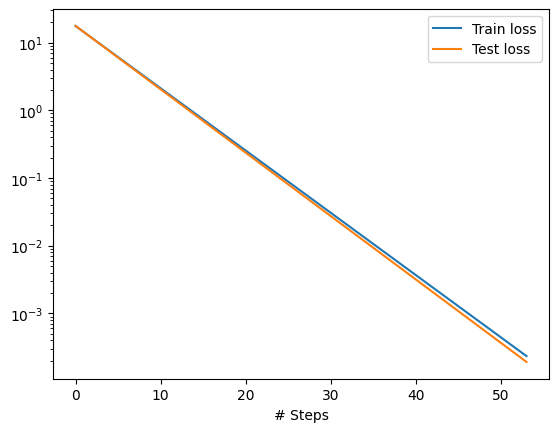

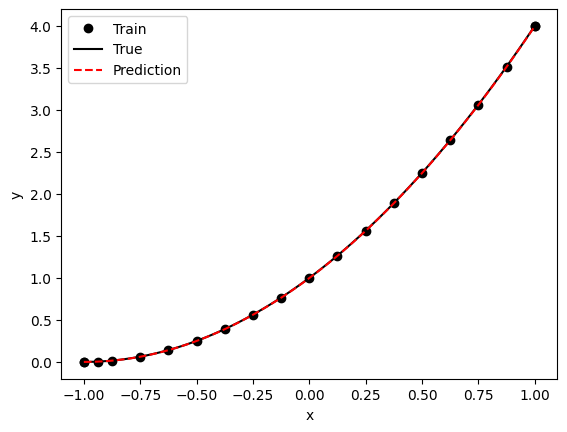

In [7]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import numpy as np


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    return dy_xx - 2


def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], -1)


def boundary_r(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 1)


def func(x):
    return (x + 1) ** 2


geom = dde.geometry.Interval(-1, 1)
bc_l = dde.icbc.DirichletBC(geom, func, boundary_l)
bc_r = dde.icbc.NeumannBC(geom, lambda X: 2 * (X + 1), boundary_r)
data = dde.data.PDE(geom, pde, [bc_l, bc_r], 16, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
dde.optimizers.config.set_LBFGS_options(
    maxcor=50,
    ftol=1.0 * np.finfo(float).eps,
    gtol=1e-3,
    maxiter=100,
    maxfun=10000,
    maxls=50,
)
# model.compile("adam", lr=0.001, metrics=["l2 relative error"])
model.compile("L-BFGS")
losshistory, train_state = model.train(display_every=5)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)